In [259]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset Exploration and Pre-processing

In [262]:
data = pd.read_excel('Stock market data (1) (1).xlsx')
data


,timestamp,symbol,open_price,high_price,low_price,close_price,volume
0,2025-01-07 05:15:00,NSE:ABB-EQ,6701.30,6704.90,6678.95,6688.85,2171
1,2025-01-07 06:00:00,NSE:ABB-EQ,6702.35,6707.20,6695.00,6699.95,1946
2,2025-01-07 05:45:00,NSE:ABB-EQ,6692.95,6709.25,6690.45,6703.40,4039
3,2025-01-07 09:45:00,NSE:ABB-EQ,6709.50,6709.75,6665.40,6670.60,17808
4,2025-01-07 04:45:00,NSE:ABB-EQ,6689.35,6713.25,6671.55,6703.70,9619
...,...,...,...,...,...,...,...
595,2025-01-07 07:45:00,NSE:ABB-EQ,6732.45,6733.25,6712.40,6721.10,6408
596,2025-01-07 04:15:00,NSE:ABB-EQ,6708.20,6713.00,6641.50,6648.90,13761
597,2025-01-07 05:00:00,NSE:ABB-EQ,6699.60,6704.95,6690.00,6701.30,2722
598,2025-01-07 05:30:00,NSE:ABB-EQ,6691.70,6704.75,6677.80,6692.95,3565


In [264]:
## Extracting date and time separately 
data['Date'] = pd.to_datetime(data['timestamp']).dt.date
data['Time'] = pd.to_datetime(data['timestamp']).dt.time

In [266]:
data.drop(columns=['timestamp'], inplace=True)

In [268]:
data = data[['Date', 'Time', 'symbol', 'open_price', 'high_price', 'low_price', 'close_price', 'volume']]

In [270]:
data

,Date,Time,symbol,open_price,high_price,low_price,close_price,volume
0,2025-01-07,05:15:00,NSE:ABB-EQ,6701.30,6704.90,6678.95,6688.85,2171
1,2025-01-07,06:00:00,NSE:ABB-EQ,6702.35,6707.20,6695.00,6699.95,1946
2,2025-01-07,05:45:00,NSE:ABB-EQ,6692.95,6709.25,6690.45,6703.40,4039
3,2025-01-07,09:45:00,NSE:ABB-EQ,6709.50,6709.75,6665.40,6670.60,17808
4,2025-01-07,04:45:00,NSE:ABB-EQ,6689.35,6713.25,6671.55,6703.70,9619
...,...,...,...,...,...,...,...,...
595,2025-01-07,07:45:00,NSE:ABB-EQ,6732.45,6733.25,6712.40,6721.10,6408
596,2025-01-07,04:15:00,NSE:ABB-EQ,6708.20,6713.00,6641.50,6648.90,13761
597,2025-01-07,05:00:00,NSE:ABB-EQ,6699.60,6704.95,6690.00,6701.30,2722
598,2025-01-07,05:30:00,NSE:ABB-EQ,6691.70,6704.75,6677.80,6692.95,3565


In [272]:
data.describe()

,open_price,high_price,low_price,close_price,volume
count,600.000000,600.000000,600.000000,600.000000,600.000000
mean,6344.349917,6361.547917,6324.403917,6341.670333,11170.283333
std,328.040279,325.044127,333.290727,329.120019,11183.903429
min,5497.600000,5508.850000,5405.000000,5497.900000,1037.000000
25%,6122.087500,6137.212500,6103.125000,6117.775000,5226.750000
50%,6319.350000,6335.225000,6298.600000,6318.350000,8799.000000
75%,6602.225000,6624.100000,6588.500000,6600.412500,13771.500000
max,6942.000000,6947.700000,6930.250000,6942.000000,117045.000000


In [274]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         600 non-null    object 
 1   Time         600 non-null    object 
 2   symbol       600 non-null    object 
 3   open_price   600 non-null    float64
 4   high_price   600 non-null    float64
 5   low_price    600 non-null    float64
 6   close_price  600 non-null    float64
 7   volume       600 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 37.6+ KB


In [276]:
data.isnull().sum()

Date           0
Time           0
symbol         0
open_price     0
high_price     0
low_price      0
close_price    0
volume         0
dtype: int64

In [278]:
data.duplicated().sum()

0

In [280]:
data

,Date,Time,symbol,open_price,high_price,low_price,close_price,volume
0,2025-01-07,05:15:00,NSE:ABB-EQ,6701.30,6704.90,6678.95,6688.85,2171
1,2025-01-07,06:00:00,NSE:ABB-EQ,6702.35,6707.20,6695.00,6699.95,1946
2,2025-01-07,05:45:00,NSE:ABB-EQ,6692.95,6709.25,6690.45,6703.40,4039
3,2025-01-07,09:45:00,NSE:ABB-EQ,6709.50,6709.75,6665.40,6670.60,17808
4,2025-01-07,04:45:00,NSE:ABB-EQ,6689.35,6713.25,6671.55,6703.70,9619
...,...,...,...,...,...,...,...,...
595,2025-01-07,07:45:00,NSE:ABB-EQ,6732.45,6733.25,6712.40,6721.10,6408
596,2025-01-07,04:15:00,NSE:ABB-EQ,6708.20,6713.00,6641.50,6648.90,13761
597,2025-01-07,05:00:00,NSE:ABB-EQ,6699.60,6704.95,6690.00,6701.30,2722
598,2025-01-07,05:30:00,NSE:ABB-EQ,6691.70,6704.75,6677.80,6692.95,3565


In [282]:
# Reset index to make 'Date' a column
data = data.reset_index()

# Convert 'Time' column to proper time format
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S').dt.time

data = data.sort_values(by=['Date', 'Time'])

# Set Date and Time back as a MultiIndex
data.set_index(['Date', 'Time'], inplace=True)

print(data)

                     index      symbol  open_price  high_price  low_price  \
Date       Time                                                             
2025-01-01 03:45:00    444  NSE:ABB-EQ     6912.00     6929.45    6863.15   
           04:00:00    464  NSE:ABB-EQ     6888.00     6893.05    6860.10   
           04:15:00    465  NSE:ABB-EQ     6866.60     6880.00    6846.25   
           04:30:00    463  NSE:ABB-EQ     6875.80     6898.75    6867.10   
           04:45:00    441  NSE:ABB-EQ     6879.85     6898.00    6879.05   
...                    ...         ...         ...         ...        ...   
2025-02-01 08:45:00    431  NSE:ABB-EQ     5550.00     5561.95    5506.35   
           09:00:00    432  NSE:ABB-EQ     5510.00     5550.00    5505.60   
           09:15:00    433  NSE:ABB-EQ     5539.00     5540.10    5514.00   
           09:30:00    434  NSE:ABB-EQ     5518.70     5520.00    5487.10   
           09:45:00    435  NSE:ABB-EQ     5497.60     5508.85    5480.00   

In [284]:
data.columns

Index(['index', 'symbol', 'open_price', 'high_price', 'low_price',
       'close_price', 'volume'],
      dtype='object')

In [286]:
# Here I just wanted to check timestamps, it starts from 3:45 to 9:45 at 15-min time interval
df = data
df = df.reset_index()
df["Date"] = pd.to_datetime(df["Date"])
df_filtered = df[df["Date"] == "2025-01-01"]
print(df_filtered[["Date", "Time"]])

         Date      Time
0  2025-01-01  03:45:00
1  2025-01-01  04:00:00
2  2025-01-01  04:15:00
3  2025-01-01  04:30:00
4  2025-01-01  04:45:00
5  2025-01-01  05:00:00
6  2025-01-01  05:15:00
7  2025-01-01  05:30:00
8  2025-01-01  05:45:00
9  2025-01-01  06:00:00
10 2025-01-01  06:15:00
11 2025-01-01  06:30:00
12 2025-01-01  06:45:00
13 2025-01-01  07:00:00
14 2025-01-01  07:15:00
15 2025-01-01  07:30:00
16 2025-01-01  07:45:00
17 2025-01-01  08:00:00
18 2025-01-01  08:15:00
19 2025-01-01  08:30:00
20 2025-01-01  08:45:00
21 2025-01-01  09:00:00
22 2025-01-01  09:15:00
23 2025-01-01  09:30:00
24 2025-01-01  09:45:00


In [288]:
data.columns

Index(['index', 'symbol', 'open_price', 'high_price', 'low_price',
       'close_price', 'volume'],
      dtype='object')

In [290]:
print(type(data.index))

<class 'pandas.core.indexes.multi.MultiIndex'>


In [292]:
print(data.index.names)

['Date', 'Time']


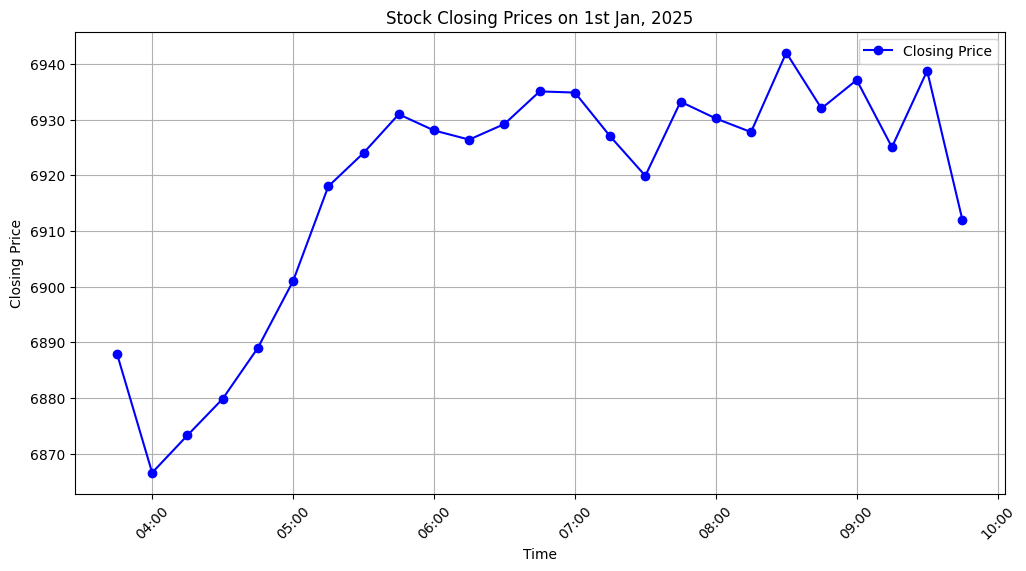

In [294]:
# Here I wanted to check whether at start i.e at 3:45 whether the closing price is at lowest and then gradually increasing at 9:45
## So tried to check for different timings

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convert index to DataFrame
df_reset = data.reset_index()

# Convert Date and Time to string and create a proper datetime column
df_reset["Datetime"] = pd.to_datetime(df_reset["Date"].astype(str) + " " + df_reset["Time"].astype(str))

# Filter for February 1st, 2025
df_filtered = df_reset[df_reset["Date"].astype(str) == "2025-01-01"]

# Plotting the closing prices
plt.figure(figsize=(12, 6))
plt.plot(df_filtered["Datetime"], df_filtered["close_price"], marker='o', linestyle='-', color='b', label="Closing Price")

# **Fix: Format the X-axis to display only time**
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))

# Customizing the plot
plt.xlabel("Time")
plt.ylabel("Closing Price")
plt.title("Stock Closing Prices on 1st Jan, 2025")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Show the plot
plt.show()



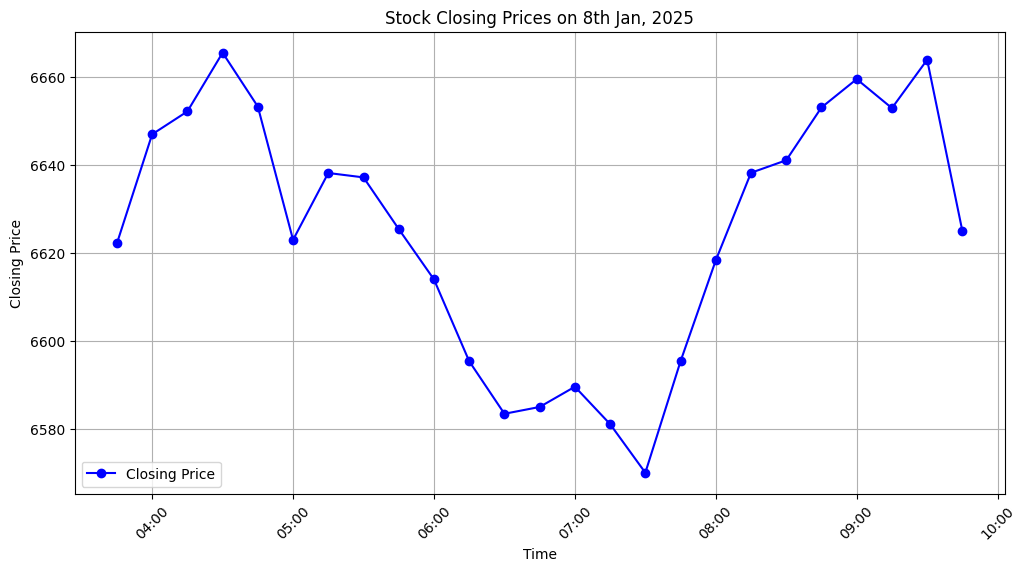

In [296]:


import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convert index to DataFrame
df_reset = data.reset_index()

# Convert Date and Time to string and create a proper datetime column
df_reset["Datetime"] = pd.to_datetime(df_reset["Date"].astype(str) + " " + df_reset["Time"].astype(str))

# Filter for February 1st, 2025
df_filtered = df_reset[df_reset["Date"].astype(str) == "2025-01-08"]

# Plotting the closing prices
plt.figure(figsize=(12, 6))
plt.plot(df_filtered["Datetime"], df_filtered["close_price"], marker='o', linestyle='-', color='b', label="Closing Price")

# **Fix: Format the X-axis to display only time**
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))

# Customizing the plot
plt.xlabel("Time")
plt.ylabel("Closing Price")
plt.title("Stock Closing Prices on 8th Jan, 2025")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Show the plot
plt.show()



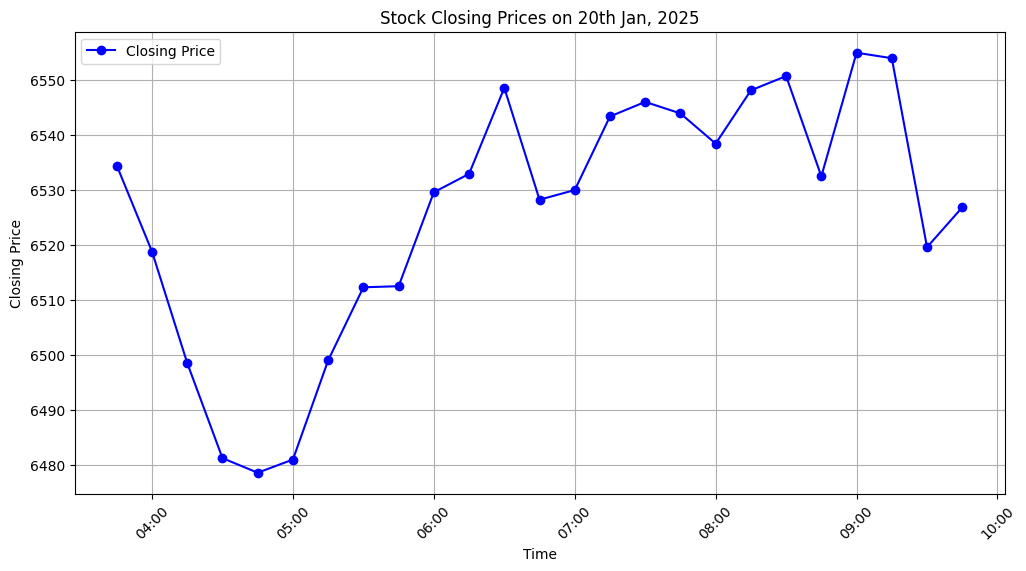

In [298]:


import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convert index to DataFrame
df_reset = data.reset_index()

# Convert Date and Time to string and create a proper datetime column
df_reset["Datetime"] = pd.to_datetime(df_reset["Date"].astype(str) + " " + df_reset["Time"].astype(str))

# Filter for February 1st, 2025
df_filtered = df_reset[df_reset["Date"].astype(str) == "2025-01-20"]

# Plotting the closing prices
plt.figure(figsize=(12, 6))
plt.plot(df_filtered["Datetime"], df_filtered["close_price"], marker='o', linestyle='-', color='b', label="Closing Price")

# **Fix: Format the X-axis to display only time**
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))

# Customizing the plot
plt.xlabel("Time")
plt.ylabel("Closing Price")
plt.title("Stock Closing Prices on 20th Jan, 2025")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Show the plot
plt.show()



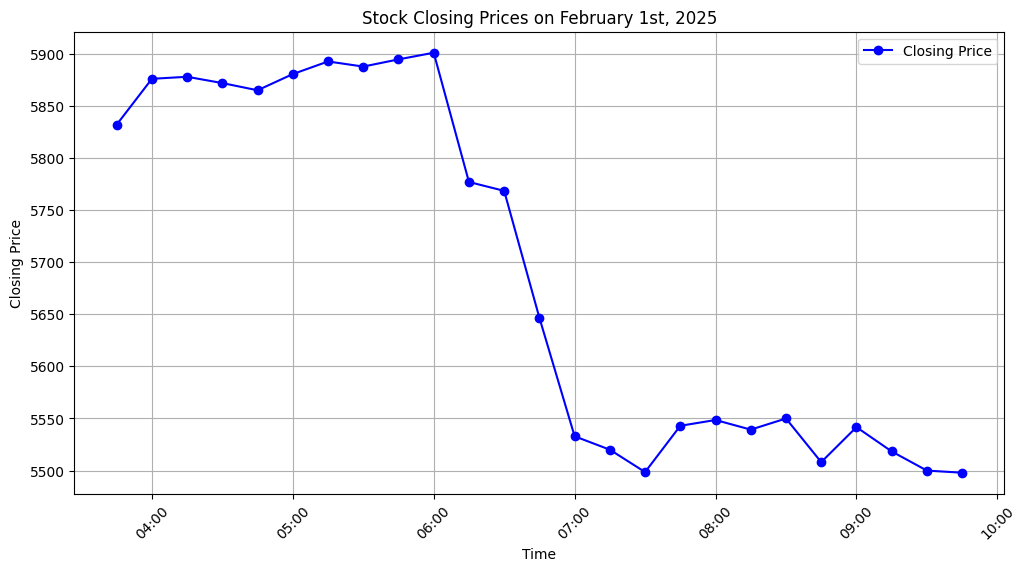

In [300]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convert index to DataFrame
df_reset = data.reset_index()

# Convert Date and Time to string and create a proper datetime column
df_reset["Datetime"] = pd.to_datetime(df_reset["Date"].astype(str) + " " + df_reset["Time"].astype(str))

# Filter for February 1st, 2025
df_filtered = df_reset[df_reset["Date"].astype(str) == "2025-02-01"]

# Plotting the closing prices
plt.figure(figsize=(12, 6))
plt.plot(df_filtered["Datetime"], df_filtered["close_price"], marker='o', linestyle='-', color='b', label="Closing Price")

# **Fix: Format the X-axis to display only time**
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))

# Customizing the plot
plt.xlabel("Time")
plt.ylabel("Closing Price")
plt.title("Stock Closing Prices on February 1st, 2025")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


In [302]:
data

index      symbol  open_price  high_price  low_price  \
Date       Time                                                             
2025-01-01 03:45:00    444  NSE:ABB-EQ     6912.00     6929.45    6863.15   
           04:00:00    464  NSE:ABB-EQ     6888.00     6893.05    6860.10   
           04:15:00    465  NSE:ABB-EQ     6866.60     6880.00    6846.25   
           04:30:00    463  NSE:ABB-EQ     6875.80     6898.75    6867.10   
           04:45:00    441  NSE:ABB-EQ     6879.85     6898.00    6879.05   
...                    ...         ...         ...         ...        ...   
2025-02-01 08:45:00    431  NSE:ABB-EQ     5550.00     5561.95    5506.35   
           09:00:00    432  NSE:ABB-EQ     5510.00     5550.00    5505.60   
           09:15:00    433  NSE:ABB-EQ     5539.00     5540.10    5514.00   
           09:30:00    434  NSE:ABB-EQ     5518.70     5520.00    5487.10   
           09:45:00    435  NSE:ABB-EQ     5497.60     5508.85    5480.00   

                     close_price  volume  
Date       Time                           
2025-01-01 03:45:00      6888.00    6708  
           04:00:00      6866.60    3387  
           04:15:00      6873.30    3667  
           04:30:00      6879.85    3122  
           04:45:00      6889.00    1223  
...                          ...     ...  
2025-02-01 08:45:00      5508.05   27021  
           09:00:00      5541.65   25506  
           09:15:00      5518.35   27510  
           09:30:00      5499.95   35346  
           09:45:00      5497.90   29420  

[600 rows x 7 columns]

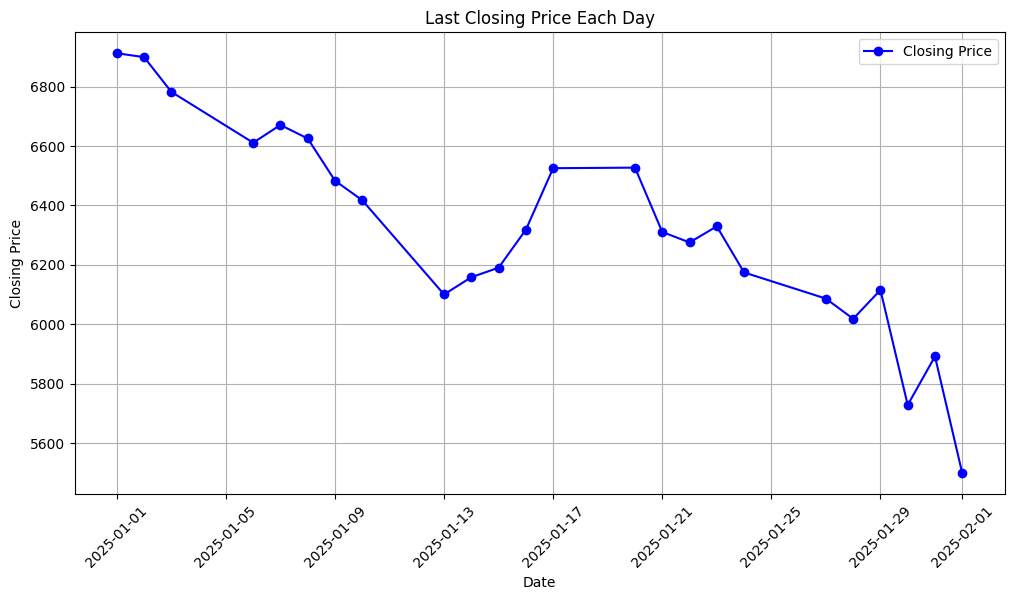

In [304]:
# Closing_prices of entire dataset, we can see that it's gradually decreasing

import pandas as pd
import matplotlib.pyplot as plt

df_reset = data.reset_index() 
daily_closing_prices = df_reset.groupby("Date")["close_price"].last()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(daily_closing_prices.index, daily_closing_prices.values, marker='o', linestyle='-', color='b', label="Closing Price")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Last Closing Price Each Day")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

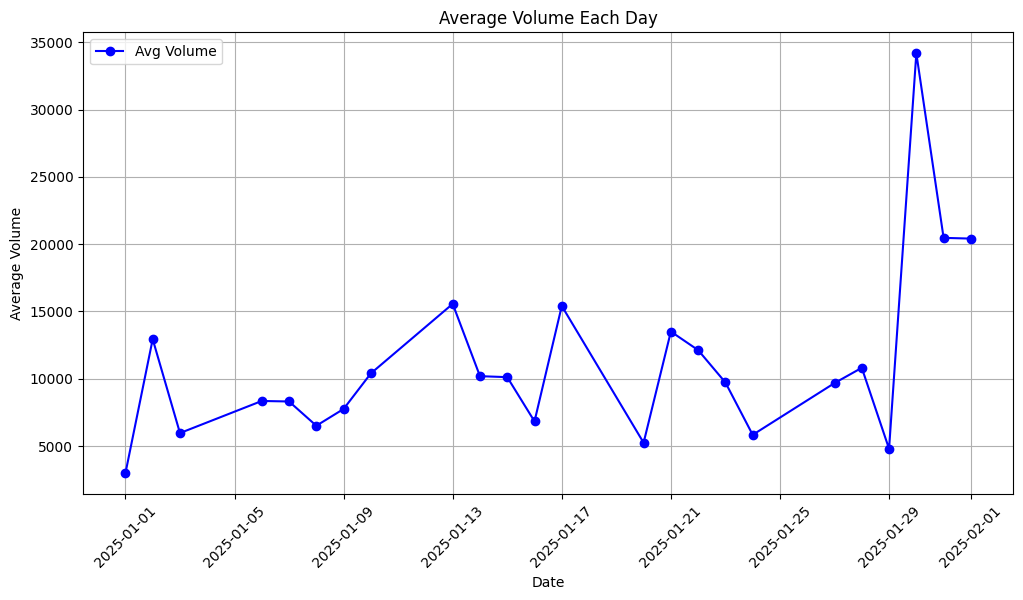

In [306]:
# Finding average volume, it seems it has increased at end

import pandas as pd
import matplotlib.pyplot as plt
df_reset = data.reset_index()
daily_avg_volume = df_reset.groupby("Date")["volume"].mean()

# Plot the average volume
plt.figure(figsize=(12, 6))
plt.plot(daily_avg_volume.index, daily_avg_volume.values, marker='o', linestyle='-', color='b', label="Avg Volume")
plt.xlabel("Date")
plt.ylabel("Average Volume")
plt.title("Average Volume Each Day")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

## Data Preprocessing

In [309]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

df = data.reset_index()
df = df.drop(columns=["symbol"])  # Remove symbol column as it is same and makes no difference

# Defining Independent (X) and Dependent (y)
features = ["open_price", "high_price", "low_price", "volume"]
target = "close_price"

X = df[features].values
y = df[target].values

# Normalize data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

In [311]:
# Function to create sequences
def create_sequences(X, y, time_step=30):
    Xs, ys = [], []
    for i in range(len(X) - time_step):
        Xs.append(X[i : i + time_step]) 
        ys.append(y[i + time_step])   
    return np.array(Xs), np.array(ys)

time_step = 30  # Last 30 time intervals
X_seq, y_seq = create_sequences(X_scaled, y_scaled, time_step)

# Split into train and test
split = int(len(X_seq) * 0.8)
X_train, X_test = X_seq[:split], X_seq[split:]
y_train, y_test = y_seq[:split], y_seq[split:]

print(f"Training samples: {X_train.shape}, Testing samples: {X_test.shape}")


Training samples: (456, 30, 4), Testing samples: (114, 30, 4)


#### Testing with different models

## Random Forest

In [315]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [317]:
X = data[["open_price", "high_price", "low_price", "volume"]]
y = data["close_price"]

In [319]:
print(type(y)) 

<class 'pandas.core.series.Series'>


In [321]:
if isinstance(y, pd.DataFrame):
    y = y["close_price"].to_numpy().reshape(-1, 1)
elif isinstance(y, pd.Series):
    y = y.to_numpy().reshape(-1, 1)

In [323]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [325]:
rf = RandomForestRegressor(n_estimators=100, max_depth=5, min_samples_split=10, random_state=42)
rf.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=5, min_samples_split=10, random_state=42)

In [327]:
y_pred = rf.predict(X_test)
y_pred

array([5996.85704378, 5996.85704378, 5996.85704378, 5996.85704378,
       5996.85704378, 5996.85704378, 5996.85704378, 6038.99057661,
       6042.36050177, 6046.69642201, 6063.05270546, 6054.94342461,
       6036.35359575, 6046.69642201, 6049.50567072, 6041.64068536,
       6065.17853008, 6053.74659886, 6002.92508794, 6003.75059032,
       6057.09949426, 6068.59707232, 6127.84304622, 6117.20537026,
       6110.32831482, 6067.45429028, 6067.33459973, 6099.14470962,
       6060.21471751, 6064.35222808, 6081.84186687, 6071.26754686,
       6071.26754686, 6088.19923617, 6095.92186573, 6092.70837673,
       6092.96541198, 6090.32495804, 6083.10693017, 6093.15775365,
       6098.85399533, 6098.85399533, 6105.9876214 , 6106.27833568,
       6109.1315608 , 6065.85106584, 6038.46517457, 6073.4236165 ,
       6055.45329158, 6000.31861919, 5996.85704378, 5996.85704378,
       5996.85704378, 6006.52030404, 5996.85704378, 5996.85704378,
       5996.85704378, 5996.85704378, 5996.85704378, 5996.85704

In [329]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)


In [331]:
print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}, R² Score: {r2:.4f}")

MAE: 130.4537, RMSE: 192.5068, R² Score: -0.2743


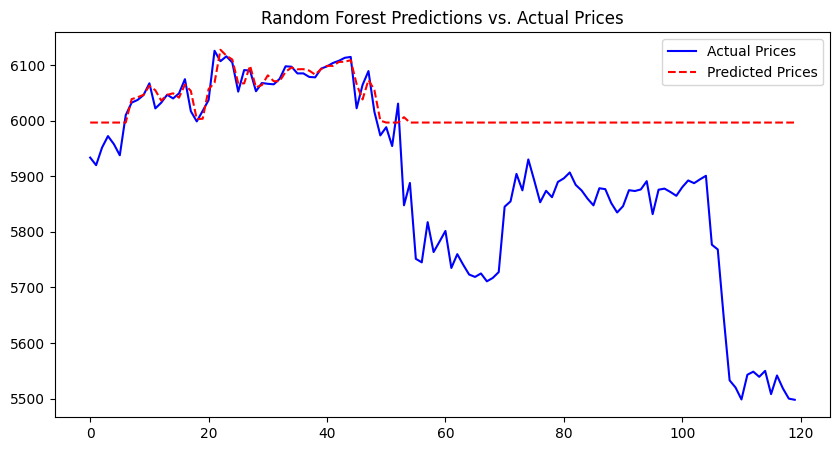

In [337]:
# Plot Actual vs. Predicted Prices
plt.figure(figsize=(10,5))
plt.plot(y_test, label="Actual Prices", color='blue')
plt.plot(y_pred, label="Predicted Prices", color='red', linestyle="dashed")
plt.legend()
plt.title("Random Forest Predictions vs. Actual Prices")
plt.show()

## As Random Forest is not giving good results so let's try other models

## XGboost Model

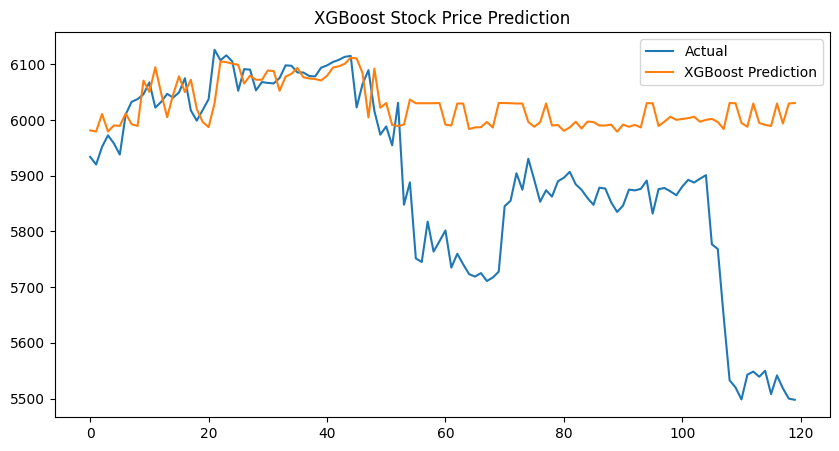

In [344]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, shuffle=False)


xgb_model = xgb.XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=5)
xgb_model.fit(X_train, y_train.ravel())


y_pred_xgb = xgb_model.predict(X_test)

y_pred_actual = scaler_y.inverse_transform(y_pred_xgb.reshape(-1, 1))
y_test_actual = scaler_y.inverse_transform(y_test)

mae = mean_absolute_error(y_test_actual, y_pred_actual)
from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(y_test_actual, y_pred_actual)
r2 = r2_score(y_test_actual, y_pred_actual)

plt.figure(figsize=(10, 5))
plt.plot(y_test_actual, label="Actual")
plt.plot(y_pred_actual, label="XGBoost Prediction")
plt.legend()
plt.title("XGBoost Stock Price Prediction")
plt.show()

## XGBoost is giving fluctuations but still not capturing after awhile

## Bidirectional LSTM

Epoch 1/20


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3046   
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0239 
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0080 
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0041 
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0029 
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0025 
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0017 
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0018 
Epoch 9/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0016     
Epoch 10/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0015 
Epoch 11/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0015 
Epoch 12/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0015 
Epoch 13/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0014 
Epoch 14/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0014 
Epoch 15/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0015 
Epoch 16/

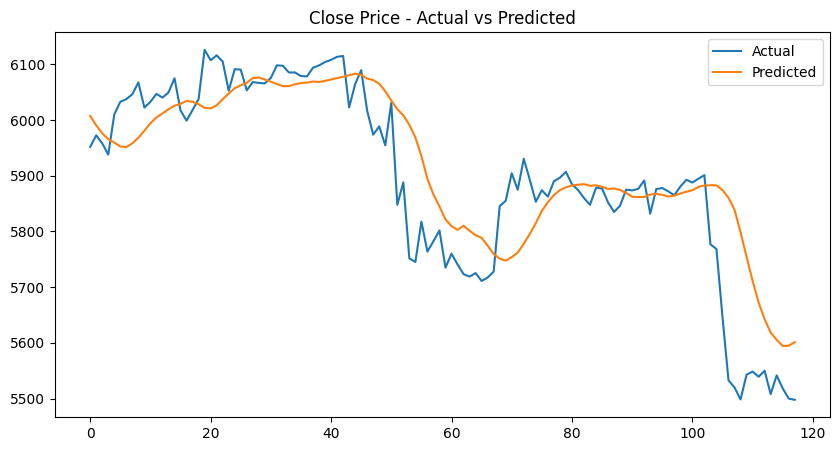

In [378]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional
import matplotlib.pyplot as plt

sequence_length = 10
def create_sequences(X, y, seq_len):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_len):
        X_seq.append(X[i:i+seq_len])
        y_seq.append(y[i+seq_len])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X_scaled, y_scaled, sequence_length)

model = Sequential()
model.add(Bidirectional(LSTM(50, return_sequences=False), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_actual = scaler_y.inverse_transform(y_test)

rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))
r2 = r2_score(y_test_actual, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

plt.figure(figsize=(10, 5))
plt.plot(y_test_actual, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("Close Price - Actual vs Predicted")
plt.legend()
plt.show()

## LSTM is performing better than other models also it is capturing most

## GRU Model

Epoch 1/20


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1967  
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0259 
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0063 
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0028 
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0022 
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0019 
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0015 
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0013 
Epoch 9/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0012 
Epoch 10/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0010     
Epoch 11/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0011 
Epoch 12/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.6875e-04 
Epoch 13/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.1811e-04 
Epoch 14/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.1887e-04 
Epoch 15/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.2953

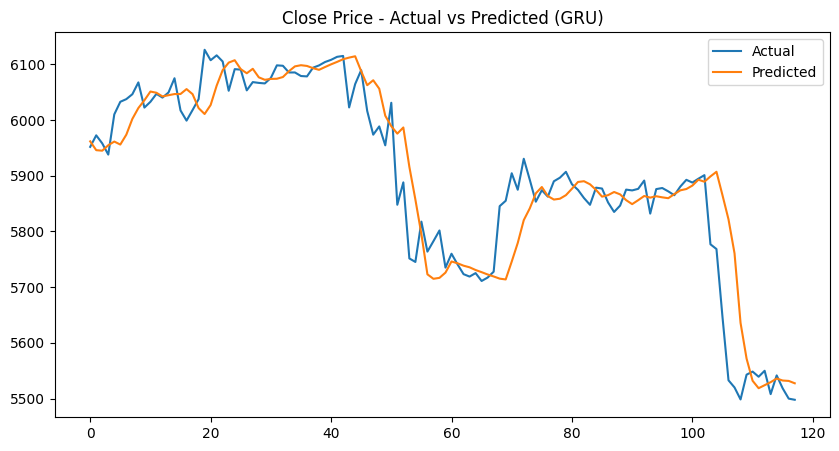

In [385]:
## GRU Based

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

sequence_length = 10
def create_sequences(X, y, seq_len):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_len):
        X_seq.append(X[i:i+seq_len])
        y_seq.append(y[i+seq_len])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X_scaled, y_scaled, sequence_length)

model = Sequential()
model.add(GRU(50, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_actual = scaler_y.inverse_transform(y_test)


rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))
r2 = r2_score(y_test_actual, y_pred)

print(f"GRU Model Evaluation:")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# Plot
plt.figure(figsize=(10, 5))
plt.plot(y_test_actual, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("Close Price - Actual vs Predicted (GRU)")
plt.legend()
plt.show()


In [387]:
## GRU is quite impressive capturing most, predictions being closer to actual

In [415]:
##  To predict further
X_seq, y_seq = create_sequences(X_scaled, y_scaled, sequence_length)


In [397]:
last_sequence = X_seq[-1]

In [399]:
future_timestamps = generate_future_timestamps("2025-02-03", "03:45:00", "09:45:00", freq_minutes=15)
print("Future timestamps:", future_timestamps)
print("Number of forecast steps:", len(future_timestamps))


Future timestamps: DatetimeIndex(['2025-02-03 03:45:00', '2025-02-03 04:00:00',
               '2025-02-03 04:15:00', '2025-02-03 04:30:00',
               '2025-02-03 04:45:00', '2025-02-03 05:00:00',
               '2025-02-03 05:15:00', '2025-02-03 05:30:00',
               '2025-02-03 05:45:00', '2025-02-03 06:00:00',
               '2025-02-03 06:15:00', '2025-02-03 06:30:00',
               '2025-02-03 06:45:00', '2025-02-03 07:00:00',
               '2025-02-03 07:15:00', '2025-02-03 07:30:00',
               '2025-02-03 07:45:00', '2025-02-03 08:00:00',
               '2025-02-03 08:15:00', '2025-02-03 08:30:00',
               '2025-02-03 08:45:00', '2025-02-03 09:00:00',
               '2025-02-03 09:15:00', '2025-02-03 09:30:00',
               '2025-02-03 09:45:00'],
              dtype='datetime64[ns]', freq='15min')
Number of forecast steps: 25


/var/folders/tw/k9k45q1n2mz10bhdchkmc8yc0000gp/T/ipykernel_1360/1090595069.py:58: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  timestamps = pd.date_range(start=start_datetime, end=end_datetime, freq=f'{freq_minutes}T')


In [ ]:
data = data['']

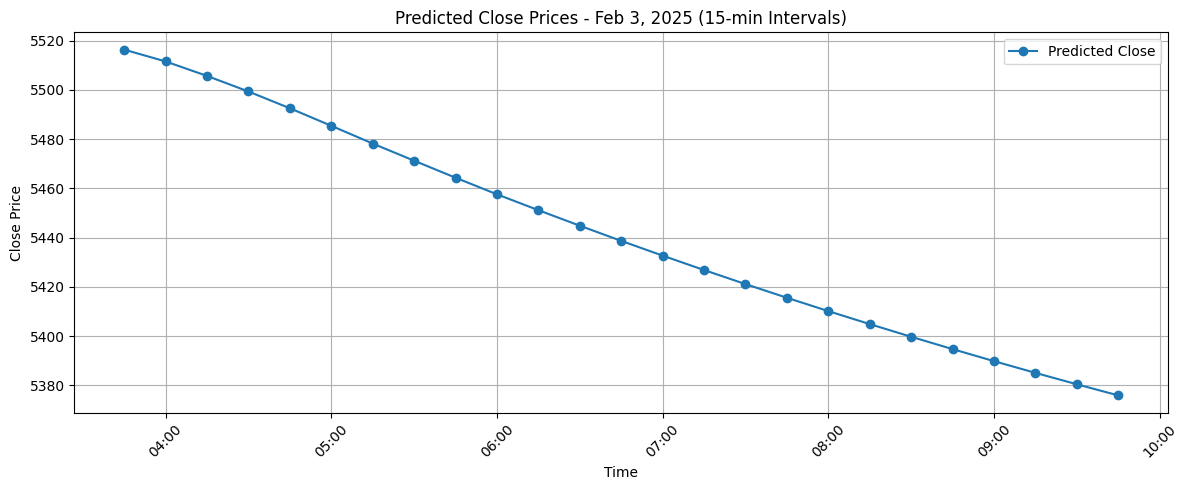

In [411]:
from datetime import datetime, timedelta
import matplotlib.dates as mdates

# Start with last sequence
last_sequence = X_scaled[-sequence_length:]
future_predictions = []
current_sequence = last_sequence.copy()

start_time = datetime(2025, 2, 3, 3, 45)
timestamps = [start_time + timedelta(minutes=15 * i) for i in range(25)]

for i in range(25):
    input_seq = current_sequence[np.newaxis, :, :]
    prediction_scaled = model.predict(input_seq, verbose=0)
    prediction = scaler_y.inverse_transform(prediction_scaled)[0][0]
    future_predictions.append(prediction)

    last_features_unscaled = scaler_X.inverse_transform(current_sequence[-1].reshape(1, -1))[0]

    open_p = prediction
    high_p = prediction * 1.002
    low_p = prediction * 0.998
    volume = last_features_unscaled[-1] 

    next_features = np.array([[open_p, high_p, low_p, prediction, volume]])  
    next_features_scaled = scaler_X.transform(next_features)    

    current_sequence = np.vstack((current_sequence[1:], next_features_scaled))

pred_df = pd.DataFrame({
    "timestamp": timestamps,
    "predicted_close_price": future_predictions
})

# Plotting
plt.figure(figsize=(12, 5))
plt.plot(pred_df["timestamp"], pred_df["predicted_close_price"], marker='o', label="Predicted Close")
plt.title("Predicted Close Prices - Feb 3, 2025 (15-min Intervals)")
plt.xlabel("Time")
plt.ylabel("Close Price")
plt.xticks(rotation=45)
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))
plt.legend()
plt.tight_layout()
plt.show()


In [413]:
## Since there is holiday on 2nd feb so here predicting for 3rd feb